# Пащук Ксения, ВПиИТ, 2 года, очное

№1 В таблице приведены рост (X) и вес (Y) нескольких людей  (n=5). Построить эмпирическую квадратичную функцию 
ошибок и найти оптимальный параметр бета

Коэффициенты: [1.39352832e-05]
Оптимальный параметр бета: 1.3935283158749147e-05
Оптимальное R2: 0.9474569453996726
[7.134864977279563, 24.080169298318527, 68.46404615893456, 81.27057138182502, 68.46404615893456]


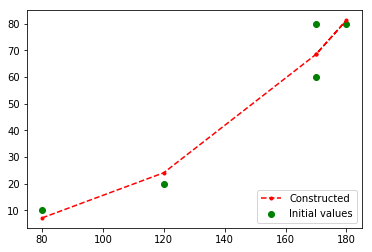

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array([80, 120, 170, 180, 170])
Y = np.array([10, 20, 80, 80, 60])


def func(X, beta=1):
    return [pow(x, 3) * beta for x in X]


regression = LinearRegression()
funcX = np.power(X, 3)
funcX = np.asmatrix(funcX.reshape(5, 1))  # convert vector to 2-dim matrix for fit function usage
regression.fit(funcX, Y)

print('Коэффициенты: {0}'.format(regression.coef_))
print('Оптимальный параметр бета: {0}'.format(regression.coef_[0]))
print('Оптимальное R2: {0}'.format(r2_score(Y, func(X, regression.coef_[0]))))
print(func(X, regression.coef_[0]))

plt.scatter(X, Y, marker='o', color='green', label='Initial values')
plt.plot(X, func(X, regression.coef_[0]), linestyle='--', marker='.', color='red', label='Constructed')
plt.legend(loc='lower right')
plt.show()


Определить, какие квартиры стоят < 80 % от предсказанной цены (недооценены), используя данные по минским квартирам.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Коэффициенты: [ 2.32808223e+15  2.32808223e+15  2.32808223e+15 ...  2.64364124e+15
  2.64364124e+15 -2.41954458e+16]
Показатель R2: 0.9777830242081417
Недооцененные квартиры:
      Предсказанная цена   Цена
29               45395.5  33250
40               49096.0  31000
134             108065.0  85000
146              71568.0  56000
159              24388.5  13000
164              21981.0  14000
165              24224.0  14000
168              37784.5  15000
169              25750.0  15000
171              23196.0  15000
173              19704.5  15000
178              22589.5  15500
181              23966.0  15900
182              21981.0  16000
188              23354.0  16600
189              28953.5  17000
191              21445.5  17000
193              25147.5  17500
196              25893.5  18000
197              37152.5  18000
199              23477.5  18000
200              26340.0  18000


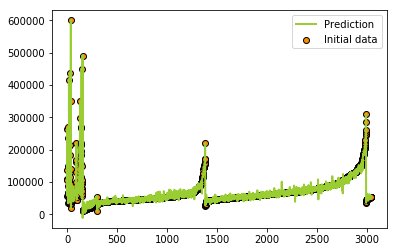

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Коэффициенты: [-5120.66534839  -380.25423191 -2735.97677359 ... 89229.62981465
 88233.43354037 90791.32684305]
Показатель R2: 0.9293526434781132
Недооцененные квартиры:
      Предсказанная цена    Цена
29          44776.886586   33250
39          31156.803269   18500
40          47775.679744   31000
44          69202.947747   41500
47          63181.624367   43200
55          74710.242451   58750
101         81266.410256   65000
146         73306.879503   56000
157         28877.579474   12000
158         33790.393302   12500
159         29546.685185   13000
161         31603.670595   13500
162         22893.352785   13500
163         24343.373367   14000
164         27723.353663   14000
165         29591.621442   14000
167         30952.576888   15000
168         32894.520307   15000
169         35548.918433   15000
170         22791.366760   15000
171     

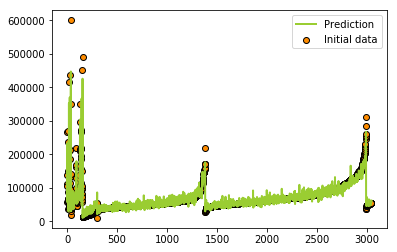

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Коэффициенты: [-2.02977257e+03  2.33784955e+01 -1.50883006e+03 ...  1.53999292e+05
  1.57612798e+05  1.35485770e+04]
Показатель R2: 0.9769820529042119
Недооцененные квартиры:
      Предсказанная цена   Цена
29          45451.594131  33250
40          49120.876336  31000
134        107322.475334  85000
146         72160.183440  56000
159         26227.526428  13000
164         22197.479323  14000
165         25309.538815  14000
168         37322.435757  15000
169         27349.377359  15000
171         23930.215742  15000
173         21604.358468  15000
178         22625.139294  15500
181         23878.398254  15900
182         22317.148160  16000
188         23377.796957  16600
189         29487.462925  17000
191         21338.493506  17000
193         25339.413247  17500
196         26446.357334  

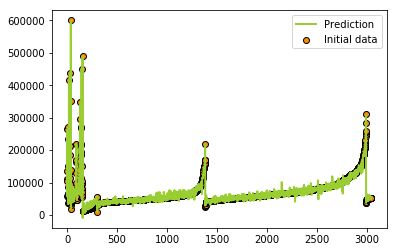

In [3]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

data = pd.read_csv('realtXY16.csv')
categories = data.loc[:, ['Район', 'Этаж', 'Жилая', 'Год', 'Квм']]
indicators = pd.get_dummies(categories, columns=['Район', 'Этаж', 'Жилая', 'Год', 'Квм'],
                            prefix=['Район', 'Этаж', 'Жилая', 'Год', 'Квм'])

price = data['Цена']
Y = price
X = indicators

classifiers = [
    LinearRegression(),
    Ridge(0.5),
    Lasso(0.5)]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X, Y)
    print('Коэффициенты: {0}'.format(clf.coef_))
    prediction = clf.predict(X)
    undervalued = pd.merge(pd.DataFrame(prediction, columns=['Предсказанная цена']), price.to_frame(), left_index=True,
                           right_index=True)
    undervalued = undervalued.loc[undervalued['Цена'] < 0.8 * undervalued['Предсказанная цена']]
    print('Показатель R2: {0}'.format(r2_score(Y, prediction)))
    print('Недооцененные квартиры:\n{0}'.format(undervalued))
    plt.scatter(np.arange(Y.size), Y, edgecolor="black",
                c="darkorange", label="Initial data")
    plt.plot(np.arange(Y.size), prediction, color="yellowgreen", label="Prediction", linewidth=2)
    plt.legend()
    plt.show();

№2 Предсказать цену квартиры на основе ее характеристик используя Дерево решений

Показатель R2: 0.99999829556054


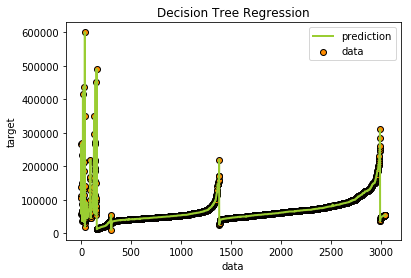

In [4]:
from sklearn import tree
from sklearn import preprocessing

clf = tree.DecisionTreeRegressor()
clf.fit(X, Y)

prediction = clf.predict(X)
print('Показатель R2: {0}'.format(r2_score(Y, prediction)))
plt.figure()
plt.scatter(np.arange(Y.size), Y, edgecolor="black",
            c="darkorange", label="data")
plt.plot(np.arange(Y.size), prediction, color="yellowgreen", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Предсказать ценовую категорию квартиры на основе ее характеристик используя Дерево решений

Процент правильно предсказанных категорий: 99.83568846533026%


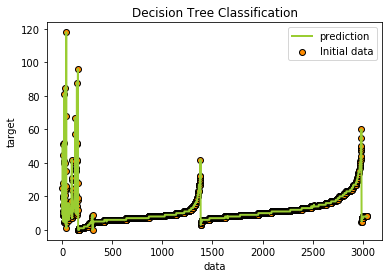

In [5]:
from sklearn import tree

minval = min(price)
maxval = max(price)
step = 5000
costIntY = Y.values
costIntervals = pd.interval_range(minval, maxval, freq=step, closed='left')
i = 0
while i < Y.size:
    if Y[i] == maxval:
        costIntY[i] = 118
    else:
        costIntY[i] = costIntervals.get_loc(Y[i])
    i += 1

clf = tree.DecisionTreeClassifier()
clf.fit(X, costIntY)
prediction = clf.predict(X)
j = 0
n = 0
while j < prediction.size:
    if prediction[j] == costIntY[j]: n += 1
    j += 1

print('Процент правильно предсказанных категорий: {0}%'.format(n * 100 / Y.size))

plt.figure()
plt.scatter(np.arange(costIntY.size), costIntY, edgecolors='black', c="darkorange", label="Initial data")
plt.plot(np.arange(costIntY.size), prediction, color="yellowgreen", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Classification")
plt.legend()
plt.show()